#### In this report, we look at the performance of cross promotion campaign on gameA across Source game X,Y,Z during 5.3-15.4.2018..
#### Specifically, the performance metrics we are benchmarking are:
#### • Conversion rate (CVR)
#### • Click-through rate (CTR)
#### • Install rate (IR)

#### User engagement metrics from D1 to D15:
#### • Retention rate 

#### In App Purchase metrics from D1 to D15:
#### • Life time Value (LTV)
#### • Paying_rate 
#### • Average Revenue Per Daily Active User (ARPU)
#### • Average Revenue Per Paying User (ARPPU)
#### • Average #of Transaction Per User (ANTPU)
#### • Average #of Transaction Per Paying User (ANTPPU)
#### • Average Revenue Per Transaction (ARPT)

####  We looked at global performance data from the following regions:
#### • United States (US).
#### • Tier 1 countries with a primarily English-speaking market (other than the US), consisting of Australia, Canada, France, Germany and United Kingdom(T1_EN).
#### • Rest of the world(ROW).



### Key Takeaways:

#### 1.Source GameX users are likely to click on ads, install new app on ads,
#### and install a new app after clicking ads during cross promotion campaigns.

##### -Users from Source GameZ are more likely to click on ads, install new app on ads,
#####  and install new app after clicking ads compared with the Source gameX and Source gameY users.

#### 2.GameA users of Source GameZ perform a better retention rate after installing the app in US from D1-D14.
##### -US Users from Source GameZ perform a better retention rate after installing the app compared with the Source gameX and Source gameY users.

#### 3.GameA users of Source GameY and Source GameZ perform a better retention rate after installing the app in T1_EN from D1-D14.
##### -T1_EN Users from Source GameY and Source GameZ perform a better retention rate after installing the app compared with the Source gameX users.


#### 4.In US, gameA users of source gameZ perform a better LTV after registration from D1-D14. As in T1_EN, gameA users of source gameY perform a better LTV in the first 2 days, but gameA users of source gameZ perform a better LTV after registration since D3.
##### -US and T1_EN Users from Source GameZ perform a better Life time value after installing the app compared with the Source gameX and Source gameY users.

#### 5..In US and T1_EN, gameA users of source gameZ perform a better paying rate after registration from most of the first 14days.
##### -US and T1_EN Users from Source GameZ perform a better conversion rate to paying users after installing the app compared with the Source gameX and Source gameY users.

#### 6.In US and T1_EN, gameA users of source gameZ perform a better ANTPU in most of the first 14 days.
##### -US and T1_EN  Users from Source GameZ are more frequently to do in-app-purchase compared with the Source gameY and Source gameX users.



#### 7.In T1_EN, gameA users of source gameY and source gameZ perform a better ARPT in the most of first 14 days.
##### -Tier1_EN paying Users from Source GameY and Source GameZ are more likely to pay more in each transaction compared with the Source gameX users.


### Import the dataframe from CSV

In [1]:
#Use pandas function to read the csv file in:
import pandas as pd
#Assign the result to a variable named “df”,“pre_df”,"pos_df"

df = pd.read_csv('installs.csv')
pre_df = pd.read_csv('pre_install_activity.csv')
pos_df = pd.read_csv('post_install_activity.csv')

### Data aggregation and merge different dataset to calculate campaign performance
#### Merge pre_install_activity and daily_install data into pre_agg_df dataframe global

In [2]:
#To calculate how many installs(device_id) on the registration_date by source_game and country_code
daily_installs = df.groupby(['registration_date','source_game','country_code'])\
                   .count()\
                   .reset_index()
daily_installs = daily_installs.rename(columns = {'registration_date':'event_date','device_id':'installs'})
#Left join data on key 'event_date','source_game','country_code' to get overall data
#Fill NA value with '0'
pre_agg_df=pd.merge(pre_df, daily_installs, how='left', on=['event_date','source_game','country_code']).fillna(0)
pre_agg_df.head()

,event_date,source_game,country_code,clicks,impressions,installs
0,2018-03-05,gameY,AT,0,2,0.0
1,2018-03-05,gameY,AU,139,1651,2.0
2,2018-03-05,gameY,CA,854,4947,9.0
3,2018-03-05,gameY,DE,569,9134,12.0
4,2018-03-05,gameY,EU,1,2,0.0


### Grouping the country data into 3 groups
#### 1.US 
#### 2.T1_EN: Tier 1 countries with a primarily English-speaking market (other than the US)
#### consisting of Australia, Canada, France, Germany and Great Britain (T1 EN)
#### 3.ROW: It mean rest of the world(other than the US,GB,DE,FR,AU,CA)

In [3]:
import numpy as np
prf = pre_agg_df
conditions = [
    (prf['country_code'] == 'US'),
    (prf['country_code'] == 'CA') | (prf['country_code'] == 'GB')|(prf['country_code'] == 'DE')|(prf['country_code'] == 'FR')| (prf['country_code'] == 'AU')]
choices = ['US', 'T1_EN']
prf['region'] = np.select(conditions, choices, default='ROW')
prf.head()

,event_date,source_game,country_code,clicks,impressions,installs,region
0,2018-03-05,gameY,AT,0,2,0.0,ROW
1,2018-03-05,gameY,AU,139,1651,2.0,T1_EN
2,2018-03-05,gameY,CA,854,4947,9.0,T1_EN
3,2018-03-05,gameY,DE,569,9134,12.0,T1_EN
4,2018-03-05,gameY,EU,1,2,0.0,ROW


### Campaign data aggregation and performance metric calculation

In [4]:
source_df_agg = prf.groupby(['event_date','source_game','region'])\
                          .sum()\
                          .reset_index()  

#### To calculate CTR,CVR,Install rate by source game in US ,tier1 English countries and Rest of World.

Install rate:how many clicks on an ad it takes to lead to an installation of an app

In [5]:
#global daily performance data calculation 
source_df_agg['ctr']= source_df_agg['clicks']/source_df_agg['impressions']
source_df_agg['cvr']= source_df_agg['installs']/source_df_agg['impressions']
source_df_agg['ir']= source_df_agg['installs']/source_df_agg['clicks']
source_df_agg = source_df_agg.fillna(0)
source_df_agg.head()

,event_date,source_game,region,clicks,impressions,installs,ctr,cvr,ir
0,2018-03-05,gameX,US,159,2842,4.0,0.055947,0.001407,0.025157
1,2018-03-05,gameY,ROW,1,10,0.0,0.100000,0.000000,0.000000
2,2018-03-05,gameY,T1_EN,3236,30933,54.0,0.104613,0.001746,0.016687
3,2018-03-05,gameY,US,8108,78331,135.0,0.103509,0.001723,0.016650
4,2018-03-05,gameZ,ROW,0,11,0.0,0.000000,0.000000,0.000000


###  Data visualization 
#### We will use the boxplot and describe() function to overview the statistics information.

In [6]:
#Create a plots folder to save data visualization image
import os

if not os.path.exists("plots"):
    os.mkdir("plots")

### CTR

In [50]:
import plotly.express as px
ctr_box_fig = px.box(source_df_agg, x="region", y="ctr", color="source_game",
             title="#1:Boxplot Of CTR"
            
            )
ctr_box_fig.write_image("plots/#1:Boxplot Of CTR by region from Source Game in X,Y,Z.png")
ctr_box_fig.show()

In [8]:
ctr_desc =source_df_agg.groupby(['region','source_game'])['ctr']\
             .describe()\
             .round(2)

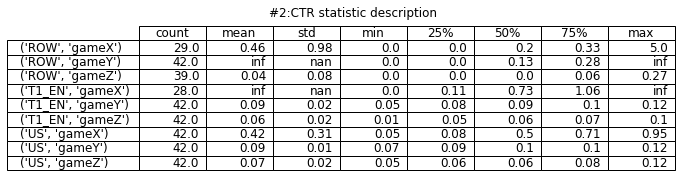

In [9]:
import matplotlib.pyplot as plt
from pandas.plotting import table


desc = ctr_desc

fig, ax = plt.subplots(figsize=(12, 3)) # set size frame
plt.title("#2:CTR statistic description")
#remove axis
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok

#create the table plot and position it in the upper left corner
tabla =table(ax, desc,loc='upper right',colWidths=[0.10]*len(desc.columns))
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1.0, 1.2) # change size table

#save the plot as a png file
plt.savefig('plots/#2:CTR statistic description.png')

In [10]:
re_ctr_desc = source_df_agg.groupby(['region'])['ctr'].describe().round(2)                            

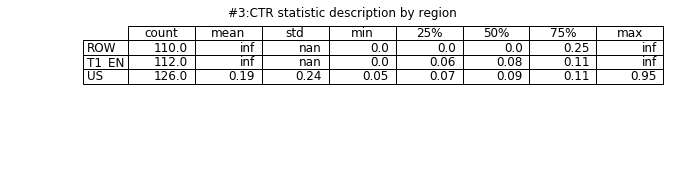

In [11]:
import matplotlib.pyplot as plt
from pandas.plotting import table


desc = re_ctr_desc

fig, ax = plt.subplots(figsize=(12, 3)) # set size frame
plt.title("#3:CTR statistic description by region")
#remove axis
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok

#create the table plot and position it in the upper left corner
tabla =table(ax, desc,loc='upper right',colWidths=[0.10]*len(desc.columns))
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1.0, 1.2) # change size table

#save the plot as a png file
plt.savefig('plots/#3:CTR statistic description by region.png')

#### Key takeaways
#### 1.Tier1_EN and US users are likely to click on ads.
#### (Based on median of CTR by region)
#### 2.Source GameX users are likely to click on ads.
#### (Based on median of CTR by region and source game)
#### -Users from Source GameX are more likely to click on an ad compared with the Source gameY and Source gameZ  users.

### CVR

In [12]:
import plotly.express as px
cvr_box_fig = px.box(source_df_agg, x="region", y="cvr", color="source_game",
        
             title="#4:Boxplot of CVR",
          
            )
cvr_box_fig.write_image("plots/#4:Boxplot Of CVR by region from Source Game in X,Y,Z.png")
cvr_box_fig.show()

In [13]:
cvr_desc = source_df_agg.groupby(['region','source_game'])['cvr'].describe().round(4)
cvr_desc

count    mean     std     min     25%     50%     75%  \
region source_game                                                          
ROW    gameX         29.0  0.0579  0.2054  0.0000  0.0000  0.0000  0.0000   
       gameY         42.0  0.0335  0.0824  0.0000  0.0000  0.0000  0.0000   
       gameZ         39.0  0.0129  0.0575  0.0000  0.0000  0.0000  0.0000   
T1_EN  gameX         28.0  0.0030  0.0027  0.0000  0.0000  0.0025  0.0052   
       gameY         42.0  0.0016  0.0005  0.0006  0.0012  0.0017  0.0019   
       gameZ         42.0  0.0019  0.0011  0.0000  0.0012  0.0020  0.0025   
US     gameX         42.0  0.0035  0.0019  0.0007  0.0020  0.0032  0.0048   
       gameY         42.0  0.0015  0.0003  0.0006  0.0012  0.0015  0.0017   
       gameZ         42.0  0.0014  0.0004  0.0006  0.0012  0.0013  0.0016   

                       max  
region source_game          
ROW    gameX        1.0000  
       gameY        0.3333  
       gameZ        0.3333  
T1_EN  gameX        0.0091  
       gameY        0.0023  
       gameZ        0.0045  
US     gameX        0.0076  
       gameY        0.0020  
       gameZ        0.0024

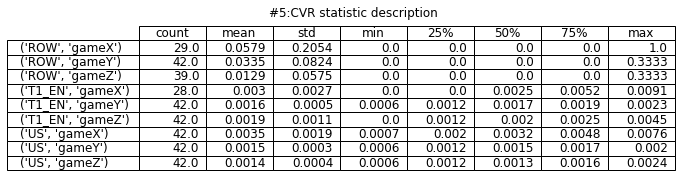

In [14]:
import matplotlib.pyplot as plt
from pandas.plotting import table


desc = cvr_desc

fig, ax = plt.subplots(figsize=(12, 3)) # set size frame
plt.title("#5:CVR statistic description")
#remove axis
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok

#create the table plot and position it in the upper left corner
tabla =table(ax, desc,loc='upper right',colWidths=[0.10]*len(desc.columns))
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1.0, 1.2) # change size table

#save the plot as a png file
plt.savefig('plots/#5:CVR statistic description.png')

In [15]:
re_cvr_desc = source_df_agg.groupby(['region'])['cvr'].describe().round(4)   
re_cvr_desc

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
ROW,110.0,0.0326,0.1219,0.0000,0.0000,0.0000,0.0000,1.0000
T1_EN,112.0,0.0020,0.0016,0.0000,0.0012,0.0018,0.0024,0.0091
US,126.0,0.0021,0.0015,0.0006,0.0013,0.0016,0.0022,0.0076


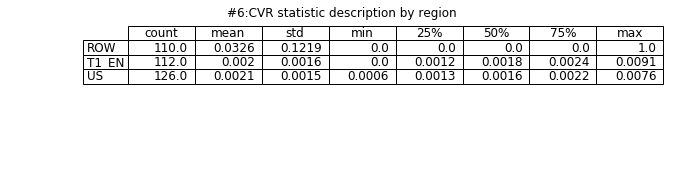

In [16]:
import matplotlib.pyplot as plt
from pandas.plotting import table


desc = re_cvr_desc

fig, ax = plt.subplots(figsize=(12, 3)) # set size frame
plt.title("#6:CVR statistic description by region")
#remove axis
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok

#create the table plot and position it in the upper left corner
tabla =table(ax, desc,loc='upper right',colWidths=[0.10]*len(desc.columns))
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1.0, 1.2) # change size table

#save the plot as a png file
plt.savefig('plots/#6:CVR statistic description by region.png')

#### Key takeaways
#### 1.Tier1_EN and US users are likely to install new app on ads.
#### (Based on median of CVR by region)
#### 2.Source GameX users are likely to install new app on ads.
#### (Based on median of CVR by region and source game)
#### -Users from Source GameX are more likely to install new app on an ad compared with the Source gameY and Source gameZ  users.

### IR(Install rate)

In [17]:
import plotly.express as px
ir_box_fig = px.box(source_df_agg, x="region", y="ir", color="source_game",
          
             title="#7:Box plot of IR",
          
            )
ir_box_fig.write_image("plots/#7:Boxplot Of IR by region from Source Game in X,Y,Z.png")
ir_box_fig.show()

In [18]:
ir_desc = source_df_agg.groupby(['region','source_game'])['ir'].describe().round(4)
ir_desc

count    mean     std     min     25%     50%     75%  \
region source_game                                                          
ROW    gameX         29.0     inf     NaN  0.0000  0.0000  0.0000  0.0000   
       gameY         42.0     inf     NaN  0.0000  0.0000  0.0000  0.0000   
       gameZ         39.0     inf     NaN  0.0000  0.0000  0.0000  0.0000   
T1_EN  gameX         28.0  0.0070  0.0125  0.0000  0.0000  0.0041  0.0068   
       gameY         42.0  0.0181  0.0065  0.0050  0.0135  0.0174  0.0221   
       gameZ         42.0  0.0306  0.0166  0.0000  0.0222  0.0312  0.0375   
US     gameX         42.0  0.0141  0.0099  0.0046  0.0069  0.0085  0.0249   
       gameY         42.0  0.0157  0.0031  0.0083  0.0140  0.0158  0.0173   
       gameZ         42.0  0.0212  0.0047  0.0114  0.0186  0.0210  0.0239   

                       max  
region source_game          
ROW    gameX           inf  
       gameY           inf  
       gameZ           inf  
T1_EN  gameX        0.0625  
       gameY        0.0411  
       gameZ        0.0625  
US     gameX        0.0350  
       gameY        0.0248  
       gameZ        0.0323

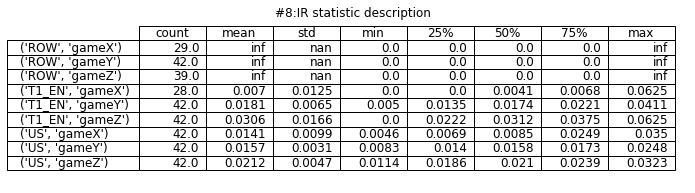

In [19]:
import matplotlib.pyplot as plt
from pandas.plotting import table


desc = ir_desc

fig, ax = plt.subplots(figsize=(12, 3)) # set size frame
plt.title("#8:IR statistic description")
#remove axis
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok

#create the table plot and position it in the upper left corner
tabla =table(ax, desc,loc='upper right',colWidths=[0.10]*len(desc.columns))
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1.0, 1.2) # change size table

#save the plot as a png file
plt.savefig('plots/#8:IR statistic description.png')

In [20]:
re_ir_desc = source_df_agg.groupby(['region'])['ir'].describe().round(4)  
re_ir_desc

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
ROW,110.0,inf,NaN,0.0000,0.0000,0.0000,0.0000,inf
T1_EN,112.0,0.020,0.0155,0.0000,0.0081,0.0178,0.0281,0.0625
US,126.0,0.017,0.0072,0.0046,0.0120,0.0167,0.0214,0.0350


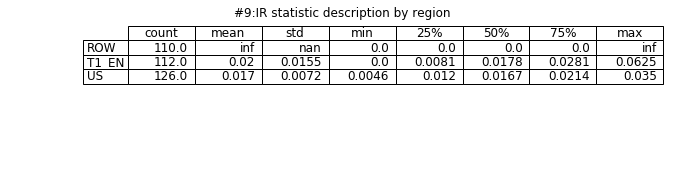

In [21]:
import matplotlib.pyplot as plt
from pandas.plotting import table


desc = re_ir_desc

fig, ax = plt.subplots(figsize=(12, 3)) # set size frame
plt.title("#9:IR statistic description by region")
#remove axis
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok

#create the table plot and position it in the upper left corner
tabla =table(ax, desc,loc='upper right',colWidths=[0.10]*len(desc.columns))
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1.0, 1.2) # change size table

#save the plot as a png file
plt.savefig('plots/#9:IR statistic description by region.png')

#### Key takeaways
#### 1.Tier1_EN and US users are likely to install new app after clicking ads.
#### (Based on median of IR by region)
#### 2.Source GameZ users are likely to install new app after clicking ads.
#### (Based on median of IR by region and source game)
#### -Users from Source GameZ are more likely to install new app on an ad compared with the Source gameX and Source gameY  users.

### Data aggregation and merge different dataset to calculate user engagement metrics
#### Merge pos_install_activity and install data into pos_agg_df dataframe global

In [22]:
#To merge post_install_activity, installs dataframe
#Left join data on key 'device_id' to get overall data
#Fill NA value with '0'
pos_agg_df=pd.merge(pos_df, df, how='left', on=['device_id']).fillna(0)
pos_agg_df.head()

,device_id,event_date,money_spent,transactions,country_code,registration_date,source_game
0,F4F8032FCE3BC43F2DA6A11015A178EAFC64700DC5CA5B...,2018-04-05,10.890000,11.0,DE,2018-03-23,gameZ
1,2274FF4B5ADC619C87B5DAA66C5B5794654A6145CB8428...,2018-03-10,47.889999,11.0,US,2018-03-09,gameZ
2,E75D97878969FE43C23B65D2B5EE2E6C4F0FF331296B3E...,2018-04-11,21.909999,9.0,US,2018-04-09,gameY
3,15867582163FA995F8D27AEC0711B9B65A49A40698E0D0...,2018-03-15,225.919998,8.0,US,2018-03-05,gameY
4,7BBE8267B7A6F558520ADAD499BE94658708898E9884CC...,2018-04-05,15.940000,6.0,CA,2018-03-27,gameY


In [23]:
#post_install_activity order by device_id(high to low).
pos_agg_df = pos_agg_df.sort_values('device_id',ascending=False)
pos_agg_df.head()

,device_id,event_date,money_spent,transactions,country_code,registration_date,source_game
32813,FFFA283243C11968AAD017EA8FA723D4F78869C000BCFE...,2018-03-16,0.0,0.0,US,2018-03-16,gameZ
39929,FFFA283243C11968AAD017EA8FA723D4F78869C000BCFE...,2018-03-17,0.0,0.0,US,2018-03-16,gameZ
27239,FFF7437E2A61042F373EE658075A54C13D7A14085AF2FE...,2018-03-28,0.0,0.0,US,2018-03-28,gameX
7534,FFEFF564D99A9F576327ABCFEFA7D138EB955744861D09...,2018-03-31,0.0,0.0,US,2018-03-31,gameX
12888,FFEDE59C1421CCBAD1C384484B15C3381660512210AA80...,2018-04-07,0.0,0.0,US,2018-04-03,gameX


#### To calculate seniority :user age since registered

In [24]:
#Format the date data
#Seniority basically tells us how old was the user on that day that user visited our GameA. 
#We add the 1 to it because it makes it more readable, 
#in the sense that seniority 10 means the user was on his/her 10th day since register.
pos_agg_df.registration_date = pd.to_datetime(pos_agg_df.registration_date)

pos_agg_df.event_date = pd.to_datetime(pos_agg_df.event_date)

pos_agg_df['seniority'] = (pos_agg_df['event_date'] - pos_agg_df['registration_date']).dt.days+1

pos_agg_df.head(30)

,device_id,event_date,money_spent,transactions,country_code,registration_date,source_game,seniority
32813,FFFA283243C11968AAD017EA8FA723D4F78869C000BCFE...,2018-03-16,0.0,0.0,US,2018-03-16,gameZ,1
39929,FFFA283243C11968AAD017EA8FA723D4F78869C000BCFE...,2018-03-17,0.0,0.0,US,2018-03-16,gameZ,2
27239,FFF7437E2A61042F373EE658075A54C13D7A14085AF2FE...,2018-03-28,0.0,0.0,US,2018-03-28,gameX,1
7534,FFEFF564D99A9F576327ABCFEFA7D138EB955744861D09...,2018-03-31,0.0,0.0,US,2018-03-31,gameX,1
12888,FFEDE59C1421CCBAD1C384484B15C3381660512210AA80...,2018-04-07,0.0,0.0,US,2018-04-03,gameX,5
12900,FFEDE59C1421CCBAD1C384484B15C3381660512210AA80...,2018-04-06,0.0,0.0,US,2018-04-03,gameX,4
12904,FFEDE59C1421CCBAD1C384484B15C3381660512210AA80...,2018-04-05,0.0,0.0,US,2018-04-03,gameX,3
12920,FFEDE59C1421CCBAD1C384484B15C3381660512210AA80...,2018-04-03,0.0,0.0,US,2018-04-03,gameX,1
12870,FFEDE59C1421CCBAD1C384484B15C3381660512210AA80...,2018-04-04,0.0,0.0,US,2018-04-03,gameX,2
22424,FFECC2573264AF412019623194286166E2DA4964A54516...,2018-03-21,0.0,0.0,US,2018-03-21,gameY,1


### Grouping the country data into 3 groups
#### 1.US 
#### 2.T1_EN: Tier 1 countries with a primarily English-speaking market (other than the US)
#### consisting of Australia, Canada, France, Germany and Great Britain (T1 EN)
#### 3.ROW: It mean rest of the world(other than the US,GB,DE,FR,AU,CA)

In [25]:
import pandas as pd
import numpy as np
pf = pos_agg_df
conditions = [
    (pf['country_code'] == 'US'),
    (pf['country_code'] == 'CA') | (pf['country_code'] == 'GB')|(pf['country_code'] == 'DE')|(pf['country_code'] == 'FR')| (pf['country_code'] == 'AU')]
choices = ['US', 'T1_EN']
pf['region'] = np.select(conditions, choices, default='ROW')
pos_agg_df = pf
pos_agg_df.head()

,device_id,event_date,money_spent,transactions,country_code,registration_date,source_game,seniority,region
32813,FFFA283243C11968AAD017EA8FA723D4F78869C000BCFE...,2018-03-16,0.0,0.0,US,2018-03-16,gameZ,1,US
39929,FFFA283243C11968AAD017EA8FA723D4F78869C000BCFE...,2018-03-17,0.0,0.0,US,2018-03-16,gameZ,2,US
27239,FFF7437E2A61042F373EE658075A54C13D7A14085AF2FE...,2018-03-28,0.0,0.0,US,2018-03-28,gameX,1,US
7534,FFEFF564D99A9F576327ABCFEFA7D138EB955744861D09...,2018-03-31,0.0,0.0,US,2018-03-31,gameX,1,US
12888,FFEDE59C1421CCBAD1C384484B15C3381660512210AA80...,2018-04-07,0.0,0.0,US,2018-04-03,gameX,5,US


### Paying user data aggregation

In [26]:
#To filter Paying user with number of transactions >=1
iap_pos_agg_df = pos_agg_df.loc[pos_agg_df['transactions'] >= 1]
iap_pos_agg_df

,device_id,event_date,money_spent,transactions,country_code,registration_date,source_game,seniority,region
528,FE801D513EF2D70365C2A46E8B8799BA440F520C8BEFC6...,2018-03-16,5.99,1.0,US,2018-03-16,gameZ,1,US
272,FD0A9F1804C6DEDAB81D0DF48D2F62E10ECE0C72DBE516...,2018-03-07,1.99,1.0,US,2018-03-07,gameY,1,US
124,FD0A9F1804C6DEDAB81D0DF48D2F62E10ECE0C72DBE516...,2018-03-09,15.98,2.0,US,2018-03-07,gameY,3,US
277,FD0A9F1804C6DEDAB81D0DF48D2F62E10ECE0C72DBE516...,2018-03-20,5.99,1.0,US,2018-03-07,gameY,14,US
276,FD0A9F1804C6DEDAB81D0DF48D2F62E10ECE0C72DBE516...,2018-03-18,0.99,1.0,US,2018-03-07,gameY,12,US
...,...,...,...,...,...,...,...,...,...
692,056FE41391A0C64B7EC535637DEA247468B4B04E18A017...,2018-04-07,20.99,1.0,US,2018-04-04,gameZ,4,US
693,056FE41391A0C64B7EC535637DEA247468B4B04E18A017...,2018-04-12,19.99,1.0,US,2018-04-04,gameZ,9,US
232,056FE41391A0C64B7EC535637DEA247468B4B04E18A017...,2018-04-04,15.98,2.0,US,2018-04-04,gameZ,1,US
409,0158BBB45F5FCE84012EA72DA1AC70DE926E279725EE69...,2018-03-29,5.99,1.0,US,2018-03-20,gameZ,10,US


#### Paying user purchases data aggregation and calculation by region

In [27]:
#To calculate the DAU,total IAP and number of transactions by DayX in paying  user
re_iap_group_agg = iap_pos_agg_df.groupby(['source_game','region', 'seniority'])\
                                 .agg({'device_id':'size', 'money_spent':'sum', 'transactions':'sum'})\
                                 .reset_index()

#rename the column
re_iap_group_agg = re_iap_group_agg.rename(columns = {'seniority':'DayX','device_id':'DAU_paying','money_spent':'IAP_paying','transactions':'No_of_IAP_paying'})
#Filter their first 14 days in gameA
re_iap_group_agg = re_iap_group_agg.loc[re_iap_group_agg['DayX'] <= 15].fillna(0)
re_iap_group_agg

,source_game,region,DayX,DAU_paying,IAP_paying,No_of_IAP_paying
0,gameX,T1_EN,1,1,1.990000,1.0
1,gameX,T1_EN,2,1,5.990000,1.0
2,gameX,T1_EN,6,1,4.990000,1.0
3,gameX,T1_EN,7,1,5.990000,1.0
4,gameX,US,1,11,185.840001,16.0
...,...,...,...,...,...,...
80,gameZ,US,11,21,350.669993,33.0
81,gameZ,US,12,15,181.769996,23.0
82,gameZ,US,13,12,123.849998,15.0
83,gameZ,US,14,20,236.750000,25.0


#### Paying user retention rate calculation and dataframe merge by region

In [28]:
# We need the base for our retention rate calculation
# Here we just take the DayX=1 row of cohort_dau_data
re_iap_group_dau_base = re_iap_group_agg.loc[re_iap_group_agg['DayX'] == 1]
#rename the column
re_iap_group_dau_base = re_iap_group_dau_base.rename(columns = {'DayX':'DayX_D1_paying','DAU_paying':'DAU_paying_D1'}).drop(columns=['IAP_paying','No_of_IAP_paying'])
re_iap_group_dau_base

,source_game,region,DayX_D1_paying,DAU_paying_D1
0,gameX,T1_EN,1,1
4,gameX,US,1,11
26,gameY,T1_EN,1,8
41,gameY,US,1,34
56,gameZ,T1_EN,1,2
70,gameZ,US,1,49


In [29]:
# And now we apply the merge method to our cohort_dau_data, dividing it by the base

re_iap_cohort_dau_agg = pd.merge(re_iap_group_agg, re_iap_group_dau_base, how='left', on=['source_game','region'])

#retention_rate_calculation
re_iap_cohort_dau_agg['retention_rate_paying']= re_iap_cohort_dau_agg['DAU_paying']/re_iap_cohort_dau_agg['DAU_paying_D1']
re_iap_cohort_dau_agg

,source_game,region,DayX,DAU_paying,IAP_paying,No_of_IAP_paying,DayX_D1_paying,DAU_paying_D1,retention_rate_paying
0,gameX,T1_EN,1,1,1.990000,1.0,1.0,1.0,1.000000
1,gameX,T1_EN,2,1,5.990000,1.0,1.0,1.0,1.000000
2,gameX,T1_EN,6,1,4.990000,1.0,1.0,1.0,1.000000
3,gameX,T1_EN,7,1,5.990000,1.0,1.0,1.0,1.000000
4,gameX,US,1,11,185.840001,16.0,1.0,11.0,1.000000
...,...,...,...,...,...,...,...,...,...
80,gameZ,US,11,21,350.669993,33.0,1.0,49.0,0.428571
81,gameZ,US,12,15,181.769996,23.0,1.0,49.0,0.306122
82,gameZ,US,13,12,123.849998,15.0,1.0,49.0,0.244898
83,gameZ,US,14,20,236.750000,25.0,1.0,49.0,0.408163


#### Paying and non-paying user purchases data aggregation and calculation by region 

In [30]:
#To calculate the DAU,total IAP and number of transactions by DayX in paying and non-paying user
re_group_agg = pos_agg_df.groupby(['source_game','region', 'seniority'])\
                         .agg({'device_id':'size', 'money_spent':'sum', 'transactions':'sum'})\
                         .reset_index()
#rename the column
re_group_agg = re_group_agg.rename(columns = {'seniority':'DayX','device_id':'DAU','money_spent':'IAP_all','transactions':'No_of_IAP_all'})
#Filter their first 14 days in gameA
re_group_agg = re_group_agg.loc[re_group_agg['DayX'] <= 15].fillna(0)
re_group_agg

,source_game,region,DayX,DAU,IAP_all,No_of_IAP_all
0,gameX,ROW,1,10,0.000000,0.0
1,gameX,ROW,2,7,0.000000,0.0
2,gameX,ROW,3,1,0.000000,0.0
3,gameX,ROW,4,4,0.000000,0.0
4,gameX,ROW,5,1,0.000000,0.0
...,...,...,...,...,...,...
126,gameZ,US,11,504,350.669993,33.0
127,gameZ,US,12,520,181.769996,23.0
128,gameZ,US,13,501,123.849998,15.0
129,gameZ,US,14,478,236.750000,25.0


#### LTV data preparation on cumulative revenue to day15 by region

In [31]:
#LTV data preparation on cumulative revenue to day15
#The average LTV for a cohort is calculated by adding the cumulative revenue for each day since install and dividing it by the number of users in that cohort:

#Dx LTV = (Total revenue from D0 to Dx days / Number of users that installed on D0)

#Note: X is the day that you are calculating the LTV for. For example:

#D3 LTV = (Total revenue of D0 + D1 + D2 + D3) / Number of users that installed on D0
#Reference from https://support.google.com/admob/answer/9736630?hl=en

re_ltv_group_agg = re_group_agg.drop(columns=['DAU','No_of_IAP_all'])
re_ltv_group_agg = re_ltv_group_agg.groupby(['source_game','region', 'DayX']).sum() \
                                   .groupby(level=0).cumsum()\
                                   .reset_index()

#rename the column
re_ltv_group_agg = re_ltv_group_agg.rename(columns = {'IAP_all':'IAP_cum'})
re_ltv_group_agg

,source_game,region,DayX,IAP_cum
0,gameX,ROW,1,0.000000
1,gameX,ROW,2,0.000000
2,gameX,ROW,3,0.000000
3,gameX,ROW,4,0.000000
4,gameX,ROW,5,0.000000
...,...,...,...,...
126,gameZ,US,11,3227.709938
127,gameZ,US,12,3409.479934
128,gameZ,US,13,3533.329932
129,gameZ,US,14,3770.079932


#### Retention rate calculation and dataframe merge by region

In [32]:
# We need the base for our retention rate calculation
# Here we just take the DayX=1 row of cohort_dau_data
re_group_dau_base = re_group_agg.loc[re_group_agg['DayX'] == 1]
#rename the column
re_group_dau_base = re_group_dau_base.rename(columns = {'DayX':'DayX_D1','DAU':'DAU_D1'}).drop(columns=['IAP_all','No_of_IAP_all'])
re_group_dau_base

,source_game,region,DayX_D1,DAU_D1
0,gameX,ROW,1,10
12,gameX,T1_EN,1,121
27,gameX,US,1,1664
42,gameY,ROW,1,31
57,gameY,T1_EN,1,1093
72,gameY,US,1,3615
87,gameZ,ROW,1,9
101,gameZ,T1_EN,1,216
116,gameZ,US,1,2246


In [33]:
# And now we apply the merge method to our cohort_dau_data, dividing it by the base

re_cohort_dau_agg = pd.merge(re_group_agg, re_group_dau_base, how='left', on=['source_game','region'])

#retention_rate_calculation
re_cohort_dau_agg['retention_rate']= re_cohort_dau_agg['DAU']/re_cohort_dau_agg['DAU_D1']
re_cohort_dau_agg

,source_game,region,DayX,DAU,IAP_all,No_of_IAP_all,DayX_D1,DAU_D1,retention_rate
0,gameX,ROW,1,10,0.000000,0.0,1,10,1.000000
1,gameX,ROW,2,7,0.000000,0.0,1,10,0.700000
2,gameX,ROW,3,1,0.000000,0.0,1,10,0.100000
3,gameX,ROW,4,4,0.000000,0.0,1,10,0.400000
4,gameX,ROW,5,1,0.000000,0.0,1,10,0.100000
...,...,...,...,...,...,...,...,...,...
126,gameZ,US,11,504,350.669993,33.0,1,2246,0.224399
127,gameZ,US,12,520,181.769996,23.0,1,2246,0.231523
128,gameZ,US,13,501,123.849998,15.0,1,2246,0.223063
129,gameZ,US,14,478,236.750000,25.0,1,2246,0.212823


In [34]:
#Merge all user and LTV data on sourcegame and DayX key
re_all_group_agg = pd.merge(re_cohort_dau_agg, re_ltv_group_agg, how='left', on=['source_game','region','DayX']).fillna(0)

#Merge paying user and all user data on sourcegame and DayX key
re_all_group_agg = pd.merge(re_all_group_agg, re_iap_cohort_dau_agg, how='left', on=['source_game','region','DayX']).fillna(0)
re_all_group_agg

,source_game,region,DayX,DAU,IAP_all,No_of_IAP_all,DayX_D1,DAU_D1,retention_rate,IAP_cum,DAU_paying,IAP_paying,No_of_IAP_paying,DayX_D1_paying,DAU_paying_D1,retention_rate_paying
0,gameX,ROW,1,10,0.000000,0.0,1,10,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
1,gameX,ROW,2,7,0.000000,0.0,1,10,0.700000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
2,gameX,ROW,3,1,0.000000,0.0,1,10,0.100000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
3,gameX,ROW,4,4,0.000000,0.0,1,10,0.400000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
4,gameX,ROW,5,1,0.000000,0.0,1,10,0.100000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,gameZ,US,11,504,350.669993,33.0,1,2246,0.224399,3227.709938,21.0,350.669993,33.0,1.0,49.0,0.428571
127,gameZ,US,12,520,181.769996,23.0,1,2246,0.231523,3409.479934,15.0,181.769996,23.0,1.0,49.0,0.306122
128,gameZ,US,13,501,123.849998,15.0,1,2246,0.223063,3533.329932,12.0,123.849998,15.0,1.0,49.0,0.244898
129,gameZ,US,14,478,236.750000,25.0,1,2246,0.212823,3770.079932,20.0,236.750000,25.0,1.0,49.0,0.408163


#### By region
#### LTV(Lifetime value),Paying_rate,ARPU,ARPPU,ANTPU(Average #of Transaction per User) ,
#### ANTPPU(Average #of Transaction per Paying User) and ARPT(Average revenue per transaction) calculation

In [35]:
#Calculate the LTV,Paying_rate,ARPU(Average revenue per User),ARPPU(Average revenue per Paying User)
#ANTPU(Average #of Transaction per User) ,ANTPPU(Average #of Transaction per Paying User) 
#and ARPT(Average revenue per transaction)
re_all_group_agg['LTV']=re_all_group_agg['IAP_cum']/re_all_group_agg['DAU_D1']
re_all_group_agg['Paying_rate']=re_all_group_agg['DAU_paying']/re_all_group_agg['DAU']
re_all_group_agg['ARPU']=re_all_group_agg['IAP_all']/re_all_group_agg['DAU']
re_all_group_agg['ARPPU']=re_all_group_agg['IAP_paying']/re_all_group_agg['DAU_paying']
re_all_group_agg['ANTPU']=re_all_group_agg['No_of_IAP_all']/re_all_group_agg['DAU']
re_all_group_agg['ANTPPU']=re_all_group_agg['No_of_IAP_paying']/re_all_group_agg['DAU_paying']
re_all_group_agg['ARPT']=re_all_group_agg['IAP_all']/re_all_group_agg['No_of_IAP_all']
re_all_group_agg = re_all_group_agg.fillna(0)
re_all_group_agg

,source_game,region,DayX,DAU,IAP_all,No_of_IAP_all,DayX_D1,DAU_D1,retention_rate,IAP_cum,...,DayX_D1_paying,DAU_paying_D1,retention_rate_paying,LTV,Paying_rate,ARPU,ARPPU,ANTPU,ANTPPU,ARPT
0,gameX,ROW,1,10,0.000000,0.0,1,10,1.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,gameX,ROW,2,7,0.000000,0.0,1,10,0.700000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,gameX,ROW,3,1,0.000000,0.0,1,10,0.100000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,gameX,ROW,4,4,0.000000,0.0,1,10,0.400000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,gameX,ROW,5,1,0.000000,0.0,1,10,0.100000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,gameZ,US,11,504,350.669993,33.0,1,2246,0.224399,3227.709938,...,1.0,49.0,0.428571,1.437093,0.041667,0.695774,16.698571,0.065476,1.571429,10.626363
127,gameZ,US,12,520,181.769996,23.0,1,2246,0.231523,3409.479934,...,1.0,49.0,0.306122,1.518023,0.028846,0.349558,12.118000,0.044231,1.533333,7.903043
128,gameZ,US,13,501,123.849998,15.0,1,2246,0.223063,3533.329932,...,1.0,49.0,0.244898,1.573166,0.023952,0.247206,10.320833,0.029940,1.250000,8.256667
129,gameZ,US,14,478,236.750000,25.0,1,2246,0.212823,3770.079932,...,1.0,49.0,0.408163,1.678575,0.041841,0.495293,11.837500,0.052301,1.250000,9.470000


### Regional User engagement analysis from retention_rate in US,T1_EN and ROW.

### Retention_rate

#### US

In [36]:
#Line plot on US retention_rate by Source Game in X,Y,Z

us_re_retention_fig = px.line(re_all_group_agg.loc[re_all_group_agg['region']=='US'], x="DayX", y="retention_rate",color='source_game', 
                        
                           title='#10:US Retention_rate by DayX since registered')
#save the image
us_re_retention_fig.write_image("plots/#10:Global DAU Trend by DayX since registered.png")
us_re_retention_fig.show()

#### Key takeaways
#### 1.GameA users of Source GameZ perform a better retention rate after installing the app in US from D1-D14.
#### -US Users from Source GameZ perform a better retention rate after installing the app compared with the Source gameX and Source gameY  users.

#### Tier1_EN

In [37]:
#Line plot on Tier1_EN retention_rate by Source Game in X,Y,Z

t1_re_retention_fig = px.line(re_all_group_agg.loc[re_all_group_agg['region']=='T1_EN'], x="DayX", y="retention_rate",color='source_game', 
                          
                           title='#11:Tier1_EN Retention_rate by DayX since registered')
#save the image
t1_re_retention_fig.write_image("plots/#11:Tier1_EN Retention_rated by DayX since registered.png")
t1_re_retention_fig.show()

#### Key takeaways
#### 1.GameA users of Source GameY and Source GameZ  perform a better retention rate after installing the app in T1_EN from D1-D14.
#### -T1_EN Users from Source GameY and Source GameZ perform a better retention rate after installing the app compared with the Source gameX  users.

#### ROW

In [38]:
#Line plot on ROW retention_rate by Source Game in X,Y,Z

row_re_retention_fig = px.line(re_all_group_agg.loc[re_all_group_agg['region']=='ROW'], x="DayX", y="retention_rate",color='source_game', 
                          # line_group="region", hover_name="region",
                           title='#12:ROW Retention_rate by DayX since registered')
#save the image
row_re_retention_fig.write_image("plots/#12:Global DAU Trend by DayX since registered.png")
row_re_retention_fig.show()

#### Key takeaways
#### 1.GameA users of Source GameX perform a better retention rate after installing the app in ROW in D1(Here we use D2).
#### 2.However, GameA users of source GameZ perform a better retention rate after installing the app in ROW in D7(Here we use D8).

### IAP analysis from LTV,Paying_rate,ARPU,ARPPU,ANTPU,ANTPPU and ARPT

### LTV 

In [39]:
#Line plot on US LTV by Source Game in X,Y,Z
us_re_ltv_fig = px.line(re_all_group_agg.loc[re_all_group_agg['region']=='US'], x="DayX", y="LTV",color='source_game', 
                        
                           title='#13:US LTV by DayX since registered')
#save the image
us_re_ltv_fig.write_image("plots/#13:US LTV by DayX since registered.png")
us_re_ltv_fig.show()

#Line plot on T1_EN LTV by Source Game in X,Y,Z
t1_re_ltv_fig = px.line(re_all_group_agg.loc[re_all_group_agg['region']=='T1_EN'], x="DayX", y="LTV",color='source_game', 
                        
                           title='#14:T1_EN LTV by DayX since registered')
#save the image
t1_re_ltv_fig.write_image("plots/#14:T1_EN LTV by DayX since registered.png")
t1_re_ltv_fig.show()

#Line plot on ROW LTV by Source Game in X,Y,Z
row_re_ltv_fig = px.line(re_all_group_agg.loc[re_all_group_agg['region']=='ROW'], x="DayX", y="LTV",color='source_game', 
                        
                           title='#15:ROW LTV by DayX since registered')
#save the image
row_re_ltv_fig.write_image("plots/#15:ROW LTV by DayX since registered.png")
row_re_ltv_fig.show()


#### Key takeaways
#### 1.In US, gameA users of source gameZ perform a better LTV after registration from D1-D14.

#### 2.In T1_EN, gameA users of source gameY perform a better LTV in the first 2 days, but gameA users of source gameZ perform a better LTV after registration since D3.

#### 3.In ROW, gameA users of source gameY perform a best LTV after registration since D8.

### Paying_rate

In [40]:
#Line plot on US Paying_rate by Source Game in X,Y,Z
us_re_pr_fig = px.line(re_all_group_agg.loc[re_all_group_agg['region']=='US'], x="DayX", y="Paying_rate",color='source_game', 
                        
                           title='#16:US Paying_rate by DayX since registered')
#save the image
us_re_pr_fig.write_image("plots/#16:US Paying_rate by DayX since registered.png")
us_re_pr_fig.show()

#Line plot on T1_EN Paying_rate by Source Game in X,Y,Z
t1_re_pr_fig = px.line(re_all_group_agg.loc[re_all_group_agg['region']=='T1_EN'], x="DayX", y="Paying_rate",color='source_game', 
                        
                           title='#17:T1_EN Paying_rate by DayX since registered')
#save the image
t1_re_pr_fig.write_image("plots/#17:T1_EN Paying_rate by DayX since registered.png")
t1_re_pr_fig.show()

#Line plot on ROW Paying_rate by Source Game in X,Y,Z
row_re_pr_fig = px.line(re_all_group_agg.loc[re_all_group_agg['region']=='ROW'], x="DayX", y="Paying_rate",color='source_game', 
                        
                           title='#18:ROW Paying_rate by DayX since registered')
#save the image
row_re_pr_fig.write_image("plots/#18:ROW Paying_rate by DayX since registered.png")
row_re_pr_fig.show()



#### Key takeaways
#### 1.In US, gameA users of source gameZ perform a better paying rate after registration from D1-D7 and D10-D14.

#### 2.In T1_EN, gameA users of source gameZ perform a better paying rate in the first 3 days and D7-D13.

#### 3.In ROW, gameA users of source gameY perform a best LTV after registration since D7.

### ARPU

In [41]:
#Line plot on US PARPU by Source Game in X,Y,Z
us_re_arpu_fig = px.line(re_all_group_agg.loc[re_all_group_agg['region']=='US'], x="DayX", y="ARPU",color='source_game', 
                        
                           title='#19:US ARPU by DayX since registered')
#save the image
us_re_arpu_fig.write_image("plots/#19:US ARPU by DayX since registered.png")
us_re_arpu_fig.show()

#Line plot on T1_EN ARPU by Source Game in X,Y,Z
t1_re_arpu_fig = px.line(re_all_group_agg.loc[re_all_group_agg['region']=='T1_EN'], x="DayX", y="ARPU",color='source_game', 
                        
                           title='#20:T1_EN ARPU by DayX since registered')
#save the image
t1_re_arpu_fig.write_image("plots/#20:T1_EN ARPU by DayX since registered.png")
t1_re_arpu_fig.show()

#Line plot on ROW ARPU by Source Game in X,Y,Z
row_re_arpu_fig = px.line(re_all_group_agg.loc[re_all_group_agg['region']=='ROW'], x="DayX", y="ARPU",color='source_game', 
                        
                           title='#21:ROW ARPU by DayX since registered')
#save the image
row_re_arpu_fig.write_image("plots/#21:ROW ARPU by DayX since registered.png")
row_re_arpu_fig.show()




#### Key takeaways
#### 1.In US, gameA users of source gameZ perform a better ARPDAU after registration in D1,D4-D7,D9-D11 and D13-D14.

#### 2.In T1_EN, gameA users of source gameZ perform a better ARPDAU in the first 3 days and D7-D14.

#### 3.In ROW, gameA users of source gameY perform a better ARPDAU after registration after D5.

### ARPPU

In [42]:
#Line plot on US ARPPU by Source Game in X,Y,Z
us_re_arppu_fig = px.line(re_all_group_agg.loc[re_all_group_agg['region']=='US'], x="DayX", y="ARPPU",color='source_game', 
                        
                           title='#22:US ARPPU by DayX since registered')
#save the image
us_re_arppu_fig.write_image("plots/#22:US ARPPU by DayX since registered.png")
us_re_arppu_fig.show()

#Line plot on T1_EN ARPPU by Source Game in X,Y,Z
t1_re_arppu_fig = px.line(re_all_group_agg.loc[re_all_group_agg['region']=='T1_EN'], x="DayX", y="ARPPU",color='source_game', 
                        
                           title='#23:T1_EN ARPPU by DayX since registered')
#save the image
t1_re_arppu_fig.write_image("plots/#23:T1_EN ARPPU by DayX since registered.png")
t1_re_arppu_fig.show()

#Line plot on ROW ARPPU by Source Game in X,Y,Z
row_re_arppu_fig = px.line(re_all_group_agg.loc[re_all_group_agg['region']=='ROW'], x="DayX", y="ARPPU",color='source_game', 
                        
                           title='#24:ROW ARPPU by DayX since registered')
#save the image
row_re_arppu_fig.write_image("plots/#24:ROW ARPPU by DayX since registered.png")
row_re_arppu_fig.show()





#### Key takeaways
#### 1.In US,gameA paying users of source gameX perform a better ARPPU in the D7.

#### 2.In T1_EN, gameA paying users of source gameY and source gameZ perform a better ARPPU in the most of first 14 days.

#### 3.In ROW, gameA paying users of source gameY perform a better ARPPU after registration after D5.

### ANTPU 

In [43]:
#Line plot on US ANTPU by Source Game in X,Y,Z
us_re_antpu_fig = px.line(re_all_group_agg.loc[re_all_group_agg['region']=='US'], x="DayX", y="ANTPU",color='source_game', 
                        
                           title='#25:US ANTPU by DayX since registered')
#save the image
us_re_antpu_fig.write_image("plots/#25:US ANTPU by DayX since registered.png")
us_re_antpu_fig.show()

#Line plot on T1_EN ANTPU by Source Game in X,Y,Z
t1_re_antpu_fig = px.line(re_all_group_agg.loc[re_all_group_agg['region']=='T1_EN'], x="DayX", y="ANTPU",color='source_game', 
                        
                           title='#26:T1_EN ANTPU by DayX since registered')
#save the image
t1_re_antpu_fig.write_image("plots/#26:T1_EN ANTPU by DayX since registered.png")
t1_re_antpu_fig.show()

#Line plot on ROW ANTPU by Source Game in X,Y,Z
row_re_antpu_fig = px.line(re_all_group_agg.loc[re_all_group_agg['region']=='ROW'], x="DayX", y="ANTPU",color='source_game', 
                        
                           title='#27:ROW ANTPU by DayX since registered')
#save the image
row_re_antpu_fig.write_image("plots/#27:ROW ANTPU by DayX since registered.png")
row_re_antpu_fig.show()



#### Key takeaways
#### 1.In US, gameA users of source gameZ perform a better ANTPU in most of the first 14 days.
#### -US Users from Source GameZ are more frequently to do in-app-purchase compared with the Source gameY and Source gameX  users.


#### 2.In T1_EN, gameA users of source gameZ perform a better ANTPU in the most of first 14 days.
#### -Tier1_EN Users from Source GameZ are more frequently to do in-app-purchase compared with the Source gameY and Source gameX  users.


#### 3.In ROW, gameA users of source gameY perform a better ANTPU after registration after D5.
#### -ROW Users from Source GameY are more frequently to do in-app-purchase compared with the Source gameX and Source gameZ  users.

### ANTPPU

In [44]:
#Line plot on US ANTPPU by Source Game in X,Y,Z
us_re_antppu_fig = px.line(re_all_group_agg.loc[re_all_group_agg['region']=='US'], x="DayX", y="ANTPPU",color='source_game', 
                        
                           title='#28:US ANTPPU by DayX since registered')
#save the image
us_re_antppu_fig.write_image("plots/#28:US ANTPPU by DayX since registered.png")
us_re_antppu_fig.show()

#Line plot on T1_EN ANTPPU by Source Game in X,Y,Z
t1_re_antppu_fig = px.line(re_all_group_agg.loc[re_all_group_agg['region']=='T1_EN'], x="DayX", y="ANTPPU",color='source_game', 
                        
                           title='#29:T1_EN ANTPPU by DayX since registered')
#save the image
t1_re_antppu_fig.write_image("plots/#29:T1_EN ANTPPU by DayX since registered.png")
t1_re_antppu_fig.show()

#Line plot on ROW ANTPPU by Source Game in X,Y,Z
row_re_antppu_fig = px.line(re_all_group_agg.loc[re_all_group_agg['region']=='ROW'], x="DayX", y="ANTPPU",color='source_game', 
                        
                           title='#30:ROW ANTPPU by DayX since registered')
#save the image
row_re_antppu_fig.write_image("plots/#30:ROW ANTPPU by DayX since registered.png")
row_re_antppu_fig.show()




#### Key takeaways
#### 1.In US, gameA users of source gameX perform a better ANTPPU in D7.
#### -US paying Users from Source GameX are more frequently to do in-app-purchase compared with the Source gameY and Source gameZ users in D7.


#### 2.In T1_EN, gameA paying users of source gameY and  source gameZ perform a better ANTPPU in the most of first 14 days.
#### -Tier1_EN paying Users from Source GameY and Source GameZ  are more frequently to do in-app-purchase compared with the Source gameX  users.


#### 3.In ROW, gameA paying users of source gameY perform a better ANTPPU after registration after D5.
#### -ROW paying Users from Source GameY are more frequently to do in-app-purchase compared with the Source gameX and Source gameZ  users.

### ARPT

In [45]:
#Line plot on US ARPT by Source Game in X,Y,Z
us_re_arpt_fig = px.line(re_all_group_agg.loc[re_all_group_agg['region']=='US'], x="DayX", y="ARPT",color='source_game', 
                        
                           title='#31:US ARPT by DayX since registered')
#save the image
us_re_arpt_fig.write_image("plots/#31:US ARPT by DayX since registered.png")
us_re_arpt_fig.show()

#Line plot on T1_EN ARPT by Source Game in X,Y,Z
t1_re_arpt_fig = px.line(re_all_group_agg.loc[re_all_group_agg['region']=='T1_EN'], x="DayX", y="ARPT",color='source_game', 
                        
                           title='#32:T1_EN ARPT by DayX since registered')
#save the image
t1_re_arpt_fig.write_image("plots/#32:T1_EN ARPT by DayX since registered.png")
t1_re_arpt_fig.show()

#Line plot on ROW ARPT by Source Game in X,Y,Z
row_re_arpt_fig = px.line(re_all_group_agg.loc[re_all_group_agg['region']=='ROW'], x="DayX", y="ARPT",color='source_game', 
                        
                           title='#33:ROW ARPT by DayX since registered')
#save the image
row_re_arpt_fig.write_image("plots/#33:ROW ARPT by DayX since registered.png")
row_re_arpt_fig.show()





#### Key takeaways
#### 1.In US, gameA users of source gameX perform a better ARPT in D2 and D7.
#### -US Users from Source GameX are more likely to pay more in each transaction compared with the Source gameY and Source gameZ users in D2 and D7.


#### 2.In T1_EN, gameA users of source gameY and  source gameZ perform a better ARPT in the most of first 14 days.
#### -Tier1_EN paying Users from Source GameY and Source GameZ  are more likely to pay more in each transaction compared with the Source gameX  users.


#### 3.In ROW, gameA users of source gameY perform a better ARPT after registration after D5.
#### -ROW paying Users from Source GameY are more  likely to pay more in each transaction compared with the Source gameX and Source gameZ  users.